In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib as matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [2]:
# def RW(T):
#     return 48.0*(1 + 4.8297e-3*T + 1.663e-6*(T**2))

In [3]:
def T_f(RW):   
    T_es_1 = -1.6721*RW**2 + 204.75*RW + 115.86
    return T_es_1

In [4]:
# def T_f(RW):
#     a = 2.84e-7
#     b = 0.00466
#     c = -0.524-RW
#     T_es_1 = (-b+np.sqrt(b**2 - (4*a*c)))/(2*a)
#     return T_es_1

In [5]:
freq = np.loadtxt("Calibrator_S11_off.s1p", usecols=0)/1e6
Gamma_off = np.loadtxt("Calibrator_S11_off.s1p", usecols=1)+np.loadtxt("Calibrator_S11_off.s1p", usecols=2)*1j
Gamma_on = np.loadtxt("Calibrator_S11_on.s1p", usecols=1)+np.loadtxt("Calibrator_S11_on.s1p", usecols=2)*1j

SWR_ON = (1+np.abs(Gamma_on))/(1-np.abs(Gamma_on))
ref_eff = (1-np.abs(Gamma_on)**2)

imp_off = 50*(1+Gamma_off)/(1-Gamma_off)
imp_on = 50*(1+Gamma_on)/(1-Gamma_on)

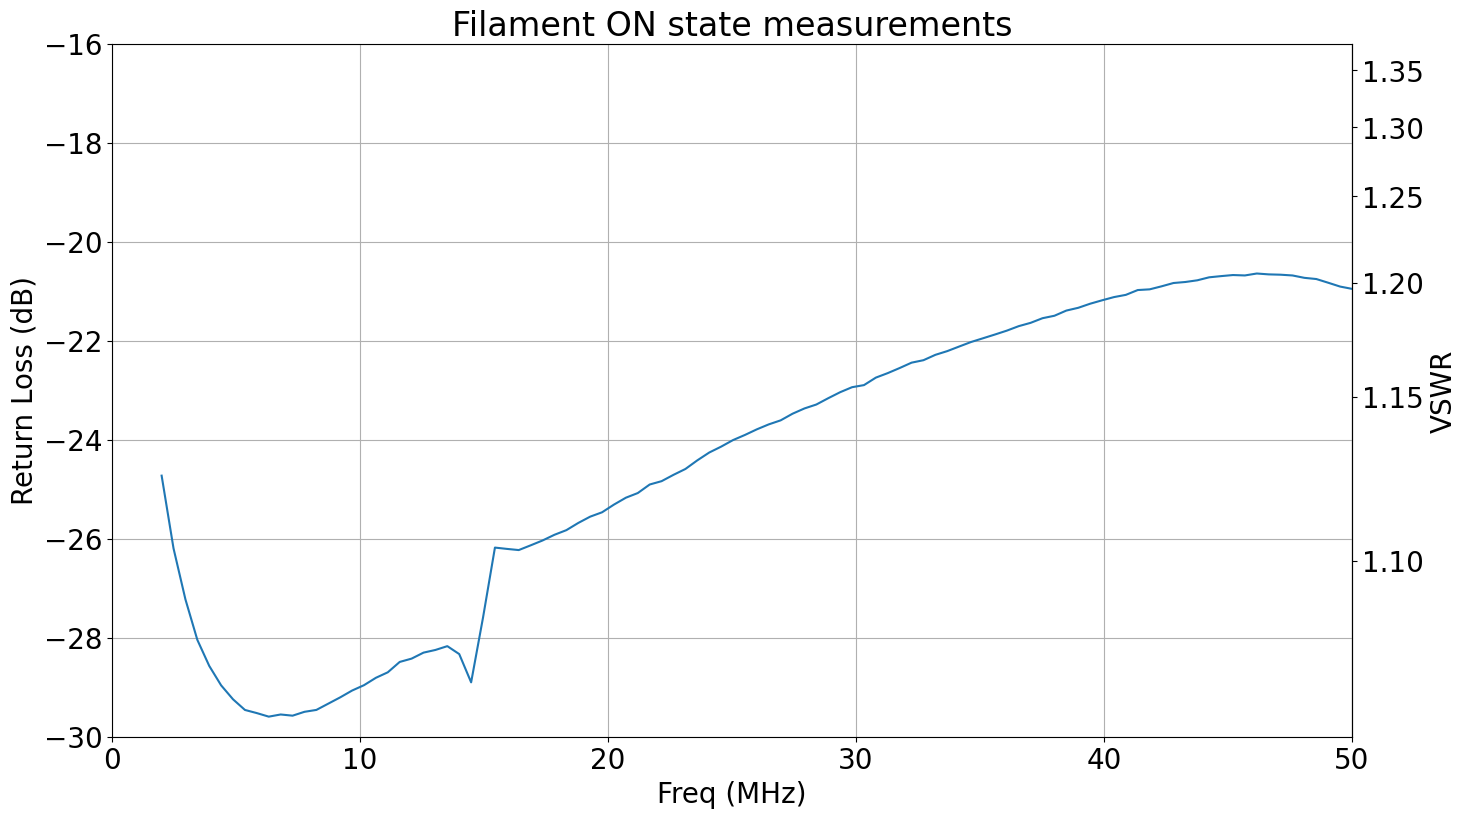

In [6]:
fig, ax = plt.subplots(figsize=(16,9))
x = freq
y = 20*np.log10(np.abs(Gamma_on))
ax.plot(x, y)
ax.set_xlabel(r'Freq (MHz)')
ax.set_ylabel(r'Return Loss (dB)')
ax.set_ylim(-30,-16)
ax.set_title(r'Filament ON state measurements')

def RL2SWR(y):
    return (10**(np.abs(y)/20)+1)/(10**(np.abs(y)/20)-1)

def SWR2RL(y):
    return 20*np.log10((np.abs(y-1))/(np.abs(y+1)))

secax = ax.secondary_yaxis('right', functions=(RL2SWR, SWR2RL))
secax.set_ylabel(r'VSWR')
ax.grid()
ax.set_xlim([0, max(x)])
fig.savefig('RL_SWR.jpg',format='jpeg',dpi=100,bbox_inches='tight')

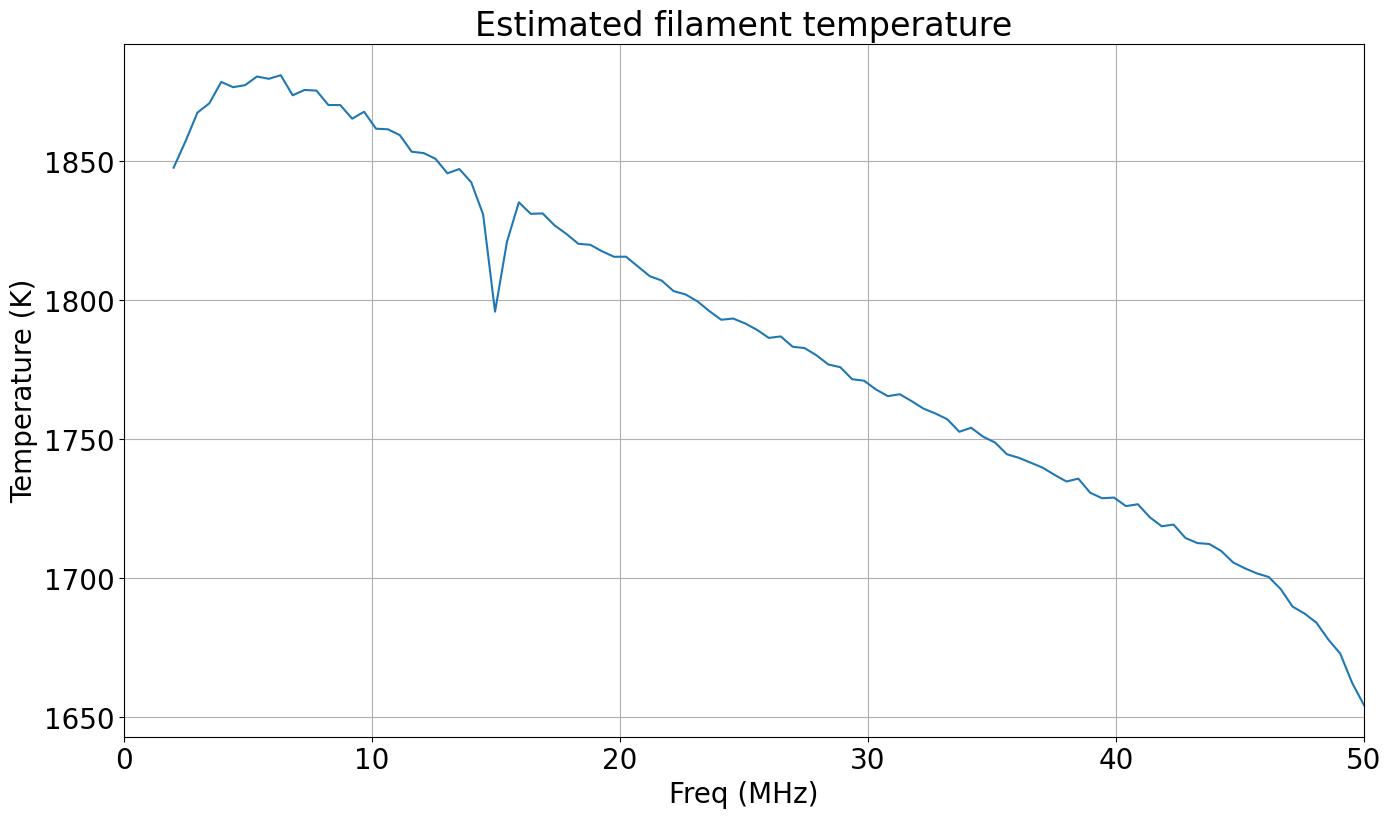

In [7]:
T_fila = T_f(np.real(imp_on)/np.real(imp_off-2))

# T_fila = T_f(52.0/5.0)*np.ones(len(np.real(imp_on)))

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(freq, T_fila)
ax.set_xlabel(r'Freq (MHz)')
ax.set_ylabel(r'Temperature (K)')
ax.set_xlim([0, max(freq)])
ax.set_title(r'Estimated filament temperature')
# ax.set_ylim([1300, 1460])
ax.grid()
fig.savefig('Fil_temp.jpg',format='jpeg',dpi=100,bbox_inches='tight')

Text(0, 0.5, 'Resistance ratio')

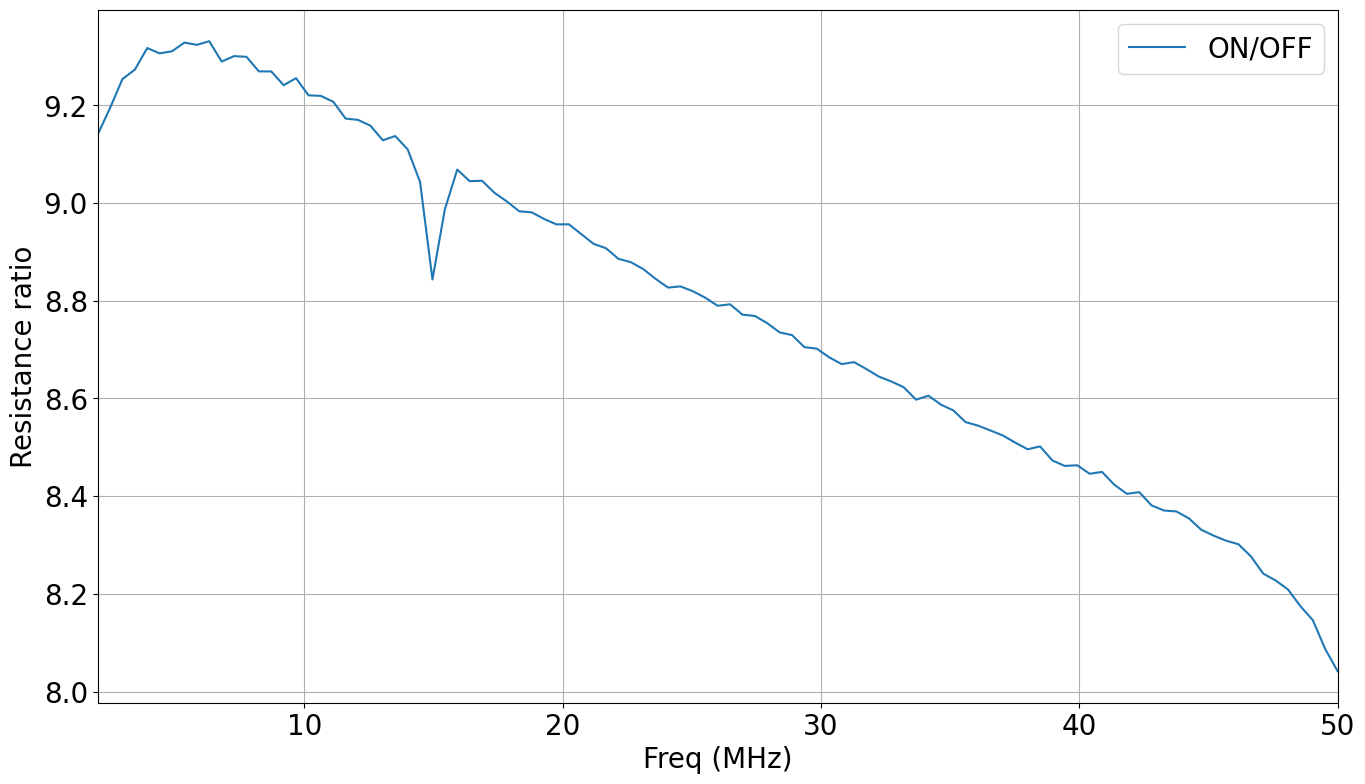

In [8]:
# plt.figure(figsize=(16,9))
# plt.plot(freq, np.real(imp_off), label="OFF")
# plt.plot(freq, np.real(imp_on), label="ON")
# plt.legend()
# plt.xlim([min(freq), max(freq)])
# plt.grid()
# plt.xlabel("Freq (MHz)")
# plt.ylabel("Resistance")

plt.figure(figsize=(16,9))
plt.plot(freq, np.real(imp_on)/np.real(imp_off-2), label="ON/OFF")
plt.legend()
plt.xlim([min(freq), max(freq)])
plt.grid()
plt.xlabel("Freq (MHz)")
plt.ylabel("Resistance ratio")

# plt.figure(figsize=(16,9))
# plt.plot(freq, np.real(imp_on), label="ON")
# plt.plot(freq, np.real(imp_on)-np.real(imp_off), label="ON-OFF")
# plt.legend()
# plt.xlim([min(freq), max(freq)])
# plt.grid()
# plt.xlabel("Freq (MHz)")
# plt.ylabel("Resistance diff")

# plt.figure(figsize=(16,9))
# plt.plot(freq, np.real(imp_on)/np.real(imp_off), label="ON/OFF")
# plt.legend()
# plt.xlim([min(freq), max(freq)])
# plt.grid()
# plt.xlabel("Freq (MHz)")
# plt.ylabel("Resistance ratio")

In [9]:
# print (T_f(50.1/8))